Sometimes, we are interested in the properties of molecules that are similar to molecules with known properties. For instance, during the Lead Optimization stage of the drug discovery process, we've already identified a lead -- a potential drug candidate. Our goal is to enhance certain properties of this lead. Medical chemists frequently make minor modifications to improve the lead's activity, selectivity, and other characteristics.

Another example is generative molecular models. These models use a scorer to guide the generation of new molecules, aiming to maximize a predicted score by making step-by-step adjustments. At each step, the generator decides how to navigate the latent space, relying on the predictive model sensitive to minor changes to direct the generation.

In both scenarios, when applying machine learning, we want to choose models that can detect these minor modifications.

The Lo splitter addresses this need by creating a split with a test consisting of clusters of similar molecules. This allows us to assess a model's ability to identify minor modifications, helping us select the most suitable model for lead optimization or as a scorer for molecular generation. Unlike other splitters, the Lo splitter reveals whether a model can only distinguish scaffolds or if it "understands" how different residues influence properties.

![Lo splitter is good](../images/lo_splitter.png)

The goal of the Lead Optimization task is to predict how minor modifications of a molecule affect its properties. The Lo splitter divides the dataset into training and test sets in such a way that:

1. The test set consists of clusters of similar molecules.
2. Clusters have a variation of the property larger than the experimental noise.
3. In each test cluster, exactly one molecule is moved to train to imitate a known lead.

## Quickstart
Imagine you want to improve solubility during lead optimization. In this case, you would want to select an ML model that is highly sensitive to minor modifications to guide your optimization cycles.

> Note that we are using a toy dataset for convenience. In real life, you should give more thought to dataset selection.

In [1]:
import datamol as dm
from splito.lohi import LoSplitter
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
from scipy.stats import spearmanr

In [2]:
data = dm.data.freesolv()
data

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917
...,...,...,...,...
637,methyl octanoate,CCCCCCCC(=O)OC,-2.04,-3.035
638,pyrrolidine,C1CCNC1,-5.48,-4.278
639,4-hydroxybenzaldehyde,c1cc(ccc1C=O)O,-8.83,-10.050
640,1-chloroheptane,CCCCCCCCl,0.29,1.467


In [3]:
lo_splitter = LoSplitter()
train_idx, cluster_idx = lo_splitter.split(data['smiles'], data['calc'])

Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality
Failed to find the pa

Now `train_idx` contains indices of molecules in the train set. `cluster_idx` contains a list of clusters, each consisting of indices of molecules in that cluster. Let's visualize a few of them.

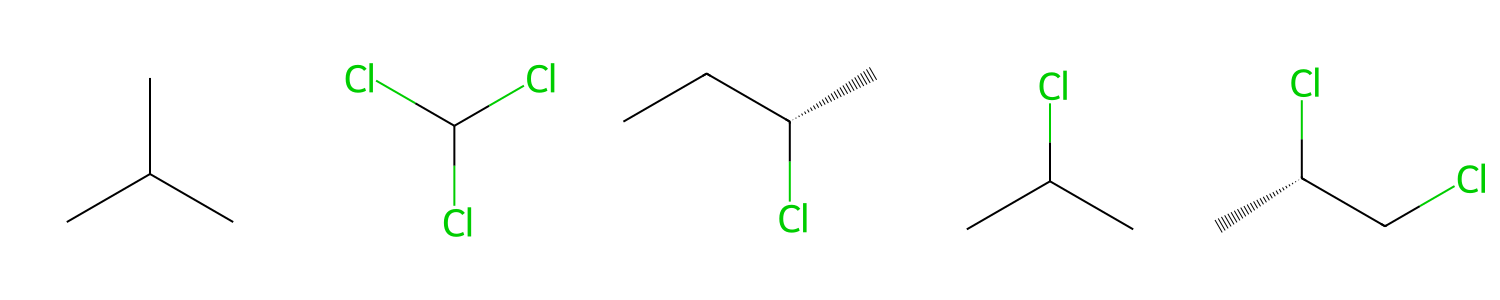

In [4]:
# Visualize a cluster
cluster_smiles = data.iloc[cluster_idx[1]]['smiles']
molecules = [Chem.MolFromSmiles(smiles) for smiles in cluster_smiles]
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(300, 300))
img

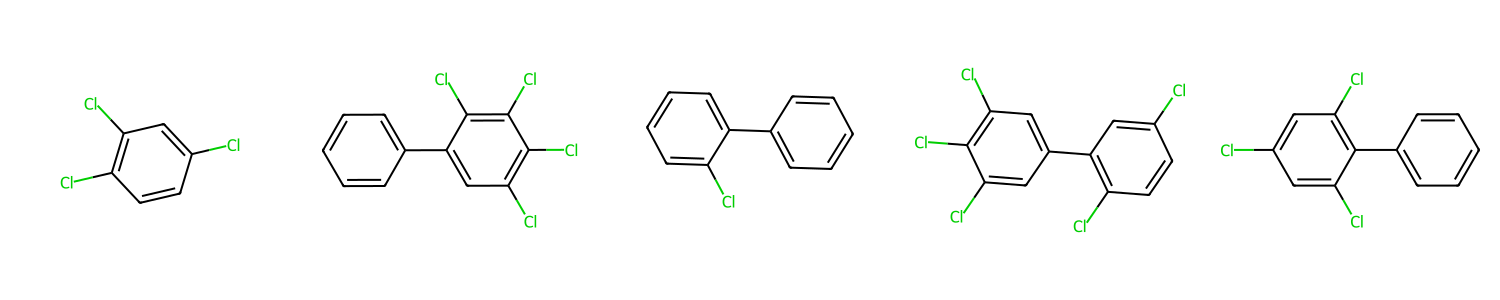

In [5]:
# Visualize another cluster
cluster_smiles = data.iloc[cluster_idx[3]]['smiles']
molecules = [Chem.MolFromSmiles(smiles) for smiles in cluster_smiles]
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(300, 300))
img

Now let's see how to evaluate ML models using this split. Our goal is to determine whether a model can make better predictions than assuming "the modified molecule is as active as the original one". We can chose Spearman’s correlation coefficient as our metric, calculated within each cluster and averaged across clusters. This metric does not rely on intracluster variation, depends solely on the ranking of molecules within the cluster, and is normalized, between minus one (ideally wrong), zero (random) and one (ideal), making it easily interpretable.

Let's skip model training and calculate Spearman's coefficient for a cluster.

In [6]:
# These are placeholders to show the workflow

def train_model(train_data):
    # add your model training here
    model = None
    return model

def predict(model, test_data):
    # add your code here
    predictions = np.random.normal(size=len(test_data))
    return predictions

In [7]:
train_data = data.iloc[train_idx]
model = train_model(train_data)

cluster = data.iloc[cluster_idx[0]]  # the first cluster
cluster_preds = predict(model, cluster)
cluster_true = cluster['calc']

spearmanr(cluster_true, cluster_preds)[0]

0.19999999999999998

Values near zero indicate poor quality of predictions, which is expected for random predictions.

## Advanced Lo splitting

Each use case is different, so the Lo splitter has several parameters that allow for flexible configuration. Let's examine them.

In [8]:
import datamol as dm
from splito.lohi import LoSplitter
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
from scipy.stats import spearmanr

In [9]:
data = dm.data.freesolv()
data

,iupac,smiles,expt,calc
0,"4-methoxy-N,N-dimethyl-benzamide",CN(C)C(=O)c1ccc(cc1)OC,-11.01,-9.625
1,methanesulfonyl chloride,CS(=O)(=O)Cl,-4.87,-6.219
2,3-methylbut-1-ene,CC(C)C=C,1.83,2.452
3,2-ethylpyrazine,CCc1cnccn1,-5.45,-5.809
4,heptan-1-ol,CCCCCCCO,-4.21,-2.917
...,...,...,...,...
637,methyl octanoate,CCCCCCCC(=O)OC,-2.04,-3.035
638,pyrrolidine,C1CCNC1,-5.48,-4.278
639,4-hydroxybenzaldehyde,c1cc(ccc1C=O)O,-8.83,-10.050
640,1-chloroheptane,CCCCCCCCl,0.29,1.467


- **threshold** -- This is the ECFP4 1024-bit Tanimoto similarity threshold. Molecules more similar than this threshold are considered too similar and can be grouped together in one cluster. The default value is 0.4.

- **min_cluster_size** -- Sets a minimum number of molecules per cluster. The default is 5. This is why in the previous section you saw clusters of five molecules.

- **max_clusters** -- The algorithm stops either when there are no more suitable clusters or when the max_clusters limit is reached. This can be useful for limiting your test set to get more molecules in the train set. The default is 50.

- **std_threshold** --  We aim to evaluate models on their ability to rank very similar molecules by activity. What if the molecules actually have the same activity and all the variability in the data is explained by experimental noise? This is quite possible since the molecules are very similar. Therefore, the algorithm only selects clusters whose intracluster variation exceeds noise variation. This behavior is controlled by the **std_threshold** parameter, which is why we pass the activity values in the `split()` method. A larger **std_threshold** results in the selection of more variable clusters. Choose this based on the quality of your data. The default is 0.60, which is the standard deviation of noise for logKi data in ChEMBL, a quite noisy dataset. If you use in-house data, a threshold of 0.2 might be more suitable. For more info see: *Steshin 2023, Lo-Hi: Practical ML Drug Discovery Benchmark, appendix B: Lo is not just a noise*

In [10]:
# An example of different parameters
lo_splitter = LoSplitter(
    threshold=0.6,
    min_cluster_size=10,
    max_clusters=50,
    std_threshold=0.2
)
train_idx, cluster_idx = lo_splitter.split(data['smiles'], data['calc'])

2024-04-06 13:40:18.116 | INFO     | splito.lohi._lo:_select_distinct_clusters:99 - Found 1 clusters.


In [11]:
data.iloc[cluster_idx[0]]

,iupac,smiles,expt,calc
37,decan-1-ol,CCCCCCCCCCO,-3.64,-2.446
39,nonane,CCCCCCCCC,3.13,3.221
88,heptane,CCCCCCC,2.67,2.925
204,hexan-1-ol,CCCCCCO,-4.40,-3.000
217,butan-1-ol,CCCCO,-4.72,-3.232
263,decane,CCCCCCCCCC,3.16,3.335
368,nonan-1-ol,CCCCCCCCCO,-3.88,-2.564
437,octan-1-ol,CCCCCCCCO,-4.09,-2.690
494,octane,CCCCCCCC,2.88,3.088
572,pentan-1-ol,CCCCCO,-4.57,-3.054


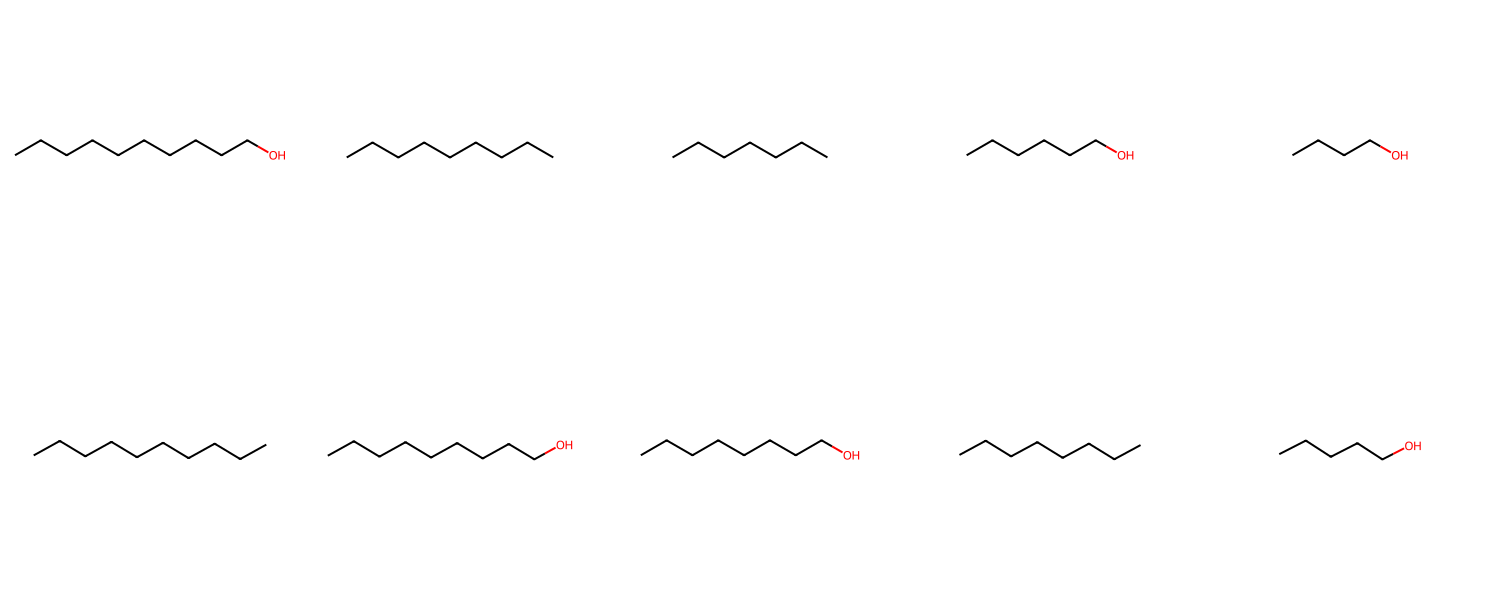

In [12]:
# Visualize the cluster
cluster_smiles = data.iloc[cluster_idx[0]]['smiles']
molecules = [Chem.MolFromSmiles(smiles) for smiles in cluster_smiles]
img = Draw.MolsToGridImage(molecules, molsPerRow=5, subImgSize=(300, 300))
img

## Further reading
We explored how to split your data to train a model for lead optimization or to guide molecular generation. You can discover which models are better suited for this Lo task or find more detailed information about Lo design in the related NeurIPS 2023 Dataset and Benchmarks paper: [Steshin 2023, Lo-Hi: Practical ML Drug Discovery Benchmark](https://arxiv.org/abs/2310.06399).